In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-07-18 09:55:40--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.188.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.1’

sarcasm.json.1      100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2022-07-18 09:55:40 (152 MB/s) - ‘sarcasm.json.1’ saved [5643545/5643545]



In [ ]:
!pip install tensorflow

In [ ]:
import json

# Load the JSON file
with open("./sarcasm.json.1", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [ ]:
training_size = 20000 #20000#
vocab_size = 10000
max_length = 32 #32#
embedding_dim = 16
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [ ]:
# Build the model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30
# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/30
625/625 [==============================] - 4s 5ms/step - loss: 0.5706 - accuracy: 0.6930 - val_loss: 0.4011 - val_accuracy: 0.8353
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3131 - accuracy: 0.8738 - val_loss: 0.3427 - val_accuracy: 0.8535
Epoch 3/30
625/625 [==============================] - 4s 6ms/step - loss: 0.2348 - accuracy: 0.9086 - val_loss: 0.3600 - val_accuracy: 0.8425
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1893 - accuracy: 0.9286 - val_loss: 0.3593 - val_accuracy: 0.8511
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 0.1580 - accuracy: 0.9410 - val_loss: 0.3854 - val_accuracy: 0.8508
Epoch 6/30
625/625 [==============================] - 3s 4ms/step - loss: 0.1326 - accuracy: 0.9543 - val_loss: 0.4186 - val_accuracy: 0.8487
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1137 - accuracy: 0.9610 - val_loss: 0.4611 - val_accuracy: 0.8422
Epoch 

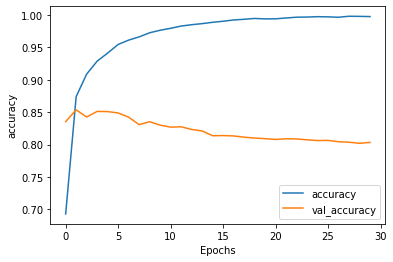

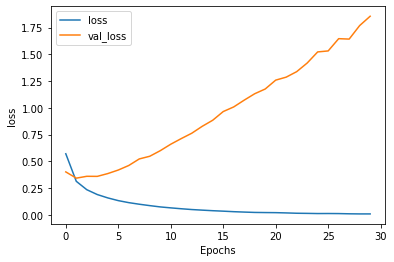

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
sentence=[
'scientists to kill ducks to see why they are dying',
'Woman missing since she got lost'   
]
sequences=tokenizer.texts_to_sequences(sentence)
padded= pad_sequences(sequences, maxlen=max_length,padding=padding_type,truncating=trunc_type)
model.predict(padded)

array([[0.9999604],
       [0.9857525]], dtype=float32)